# Analysis and Visualization of Complex Agro-Environmental Data
---
### Exercise #9 - correction

In [1]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering

#### Exercise 9.1 - Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.


In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna() # remove all rows with missing data

In [12]:
# Subset the df by selecting the environmental variables and the species richness columns
dfsub = df[(df['Catchment_name']=='Douro') | (df['Catchment_name']=='Tejo')]
df_env = dfsub[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df_env

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
4947,38,0.100,704.675069,515.039678,17.1,10.3,23.8
4948,26,0.100,702.673201,516.097287,17.1,10.4,23.6
4949,20,0.100,697.730192,518.386401,16.7,10.8,22.9
4950,13,0.100,679.784324,556.028518,16.7,10.9,22.7


ValueError: Invalid method: correlation

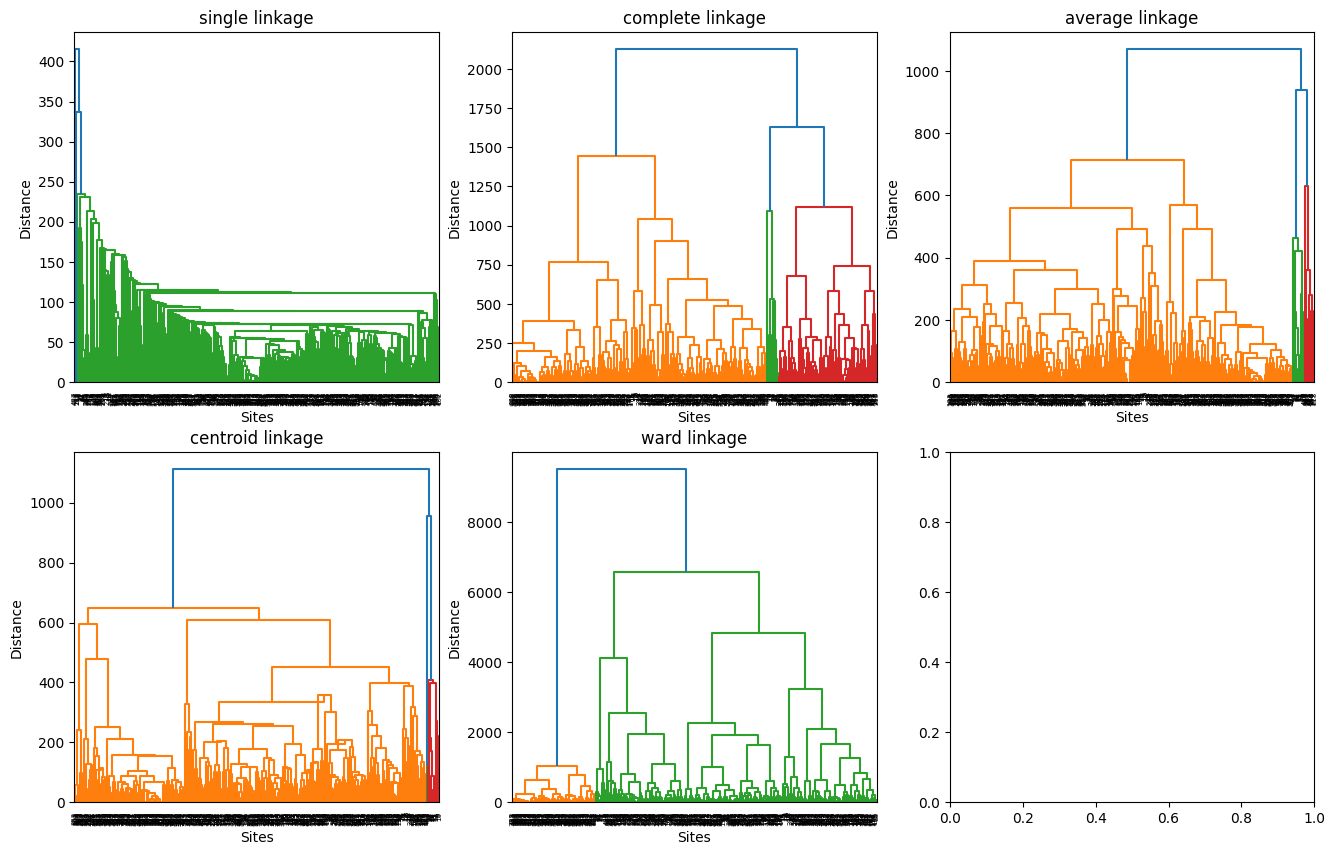

In [13]:
# using the default dissimilarty or metric (euclidean distance)
methods = ['single', 'complete', 'average', 'centroid', 'ward']
graph = 1
plt.figure(figsize=(16, 10))
for method in methods:
    plt.subplot(2, 3, graph)
    dendrogram(linkage(df_env, method=method))
    plt.title(f'{method} linkage')
    plt.xlabel('Sites')
    plt.ylabel('Distance')
    graph += 1
plt.show()

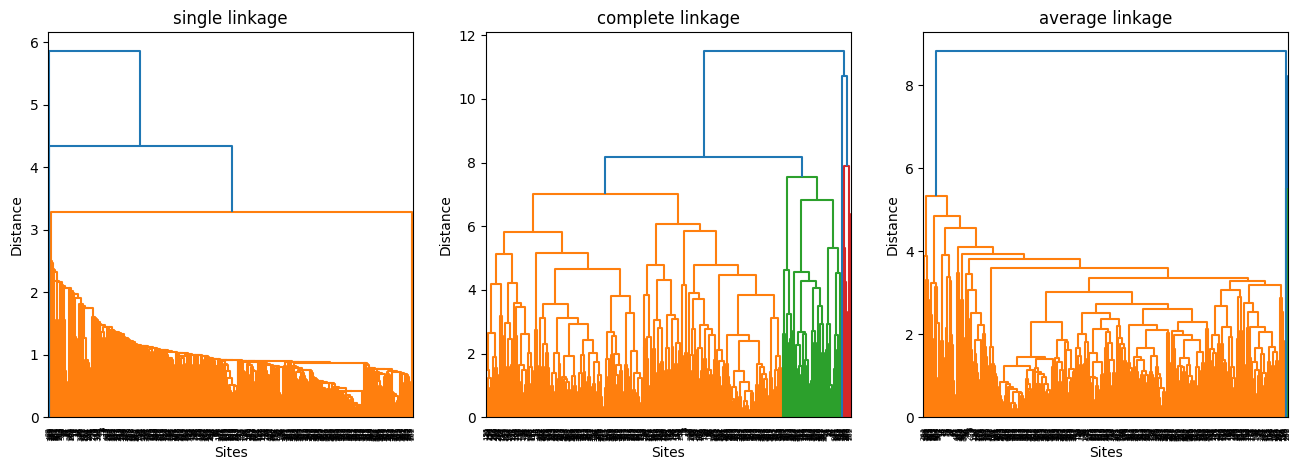

In [5]:
# Using the mahanalobis distance that is more appropriate when variables are correlated
# But this distance cannot be used with centroid and ward linkage methods
methods = ['single', 'complete', 'average']
graph = 1
plt.figure(figsize=(16, 5))
for method in methods:
    plt.subplot(1, 3, graph)
    dendrogram(linkage(df_env, method=method, metric='mahalanobis'))
    plt.title(f'{method} linkage')
    plt.xlabel('Sites')
    plt.ylabel('Distance')
    graph += 1
plt.show()

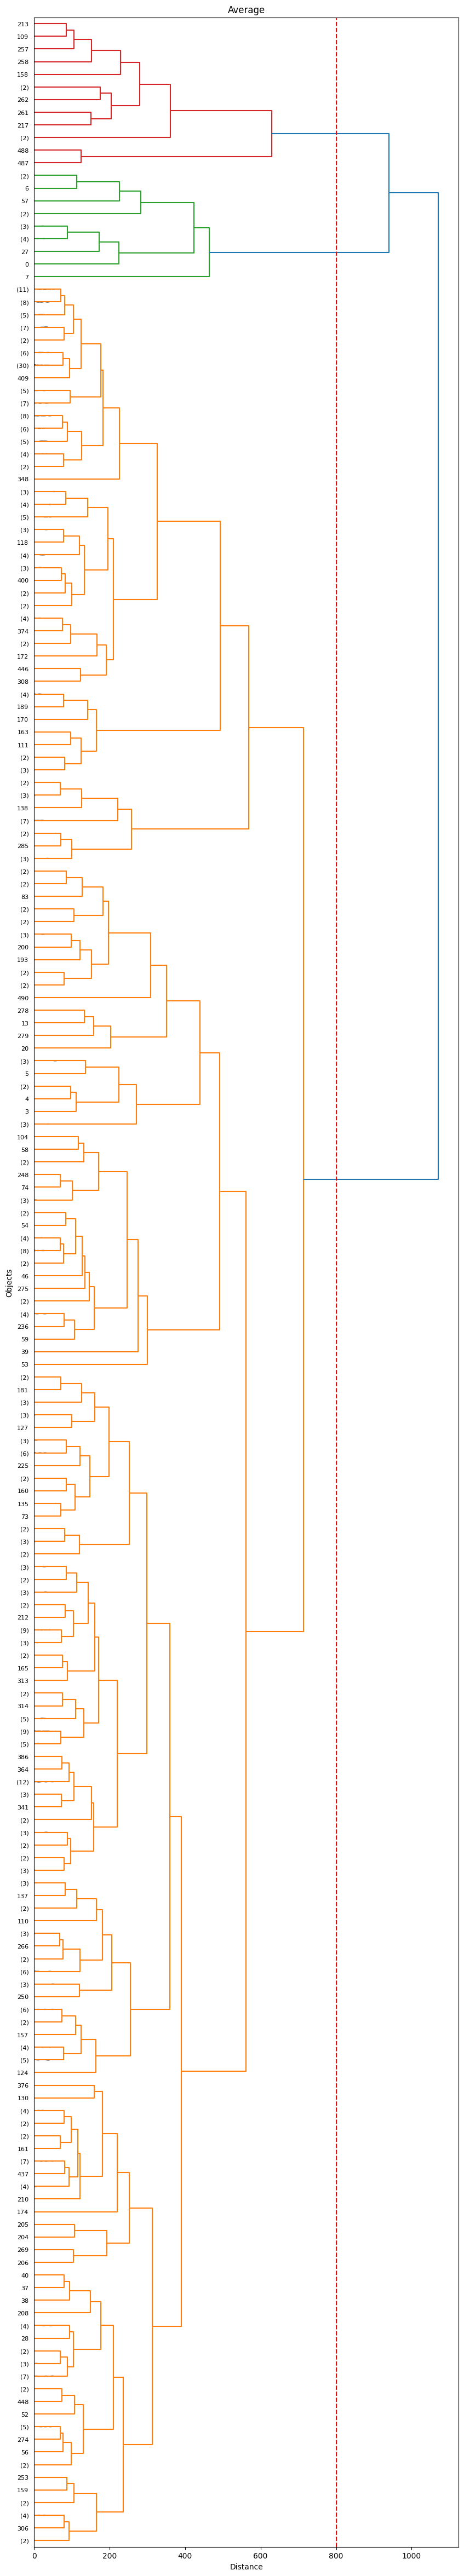

In [8]:
# run linkage
clust_link = linkage(df_env, 
                   metric = 'euclidean',
                   method='average')

# run dendrogram
plt.figure(figsize=(10, 60))
dendrogram_plot = dendrogram(clust_link, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=200,  # p merged clusters to show 
                            leaf_font_size=8.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Average' )
plt.xlabel('Distance')
plt.ylabel('Objects')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=800, color='r', linestyle='--')
plt.show()

In [9]:
# Let's now check if the clusters that were defined have anything to do with the catchments (Tejo and Douro)
# run cluster analysis and define 2 clusters
cluster3 = AgglomerativeClustering(n_clusters=3, 
                                    metric='euclidean',
                                    linkage='average')
cluster3.fit_predict(df_env)
group3_labels = cluster3.labels_
group3_labels # labels of each group of objects (each line in df)

array([2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# Crosstabulate the catchment with the clusters
mydict2 = {'Catch_name': dfsub['Catchment_name'], 'label': group3_labels}
mydf = pd.DataFrame(mydict2)

cross_df = pd.crosstab(index=mydict2['Catch_name'], columns=mydict2['label'])
print(cross_df)



col_0             0   1  2
Catchment_name            
Douro           253  10  9
Tejo            224   4  7


#### Exercise 9.2 - Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage


In [ ]:
# Plot the heatmap + dendrogram
sns.clustermap(df_env, col_cluster=False, row_cluster=True, method='average')
plt.show()

In [ ]:
# need to standardize the data (variables with different units)
from sklearn.preprocessing import StandardScaler

df_env_scaled = StandardScaler().fit_transform(df_env)
sns.clustermap(df_env_scaled, col_cluster=False, row_cluster=True, method='average')
plt.show()

Compare dendrograms obtained with non-scaled and with scaled variables:

In [ ]:
# dendrogram with non-scaled variables
dendrogram_plot = dendrogram(linkage(df_env, method='ward'))
plt.xlabel('objects')
plt.ylabel('Distance')

In [ ]:
# dendrogram with scaled variables
dendrogram_plot = dendrogram(linkage(df_env_scaled, method='ward'))
plt.xlabel('objects')
plt.ylabel('Distance')

Exercise 9.3 - Plot a dendrogram that clusters the environmental variables instead (columns) using average linkage – discuss how this would help to select variables for e.g. a regression-based analysis.

In [ ]:
# Clustering variables as a function of sites

df_env_t = df_env.T # transpose the dataset

dendrogram_plot = dendrogram(linkage(df_env_t, method='average',metric='cityblock'), orientation='right', labels=list(df_env)) # the manhattan distance is more appropriate when nvar > nobs
plt.xlabel('Distance')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Plot a correlation matrix using a subset of variables based on the previous clustering: ex. Altitude, temp_jan, temp_jul and Prec_ann_catch
subset = df_env[["Altitude", "temp_jan","temp_jul", "prec_ann_catch"]]

# Plot the matrix
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(subset, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);